# Analysis for Chess Model Training and Datasets

## Overview
This  Notebook is designed as a tool for analyzing the models and datasets, with data visualizations during training and validation phases.

The first part is about visualizing validation metrics of the models with lines and bar charts.
The second part is about analyzing the datasets


# Model Analysis

## Import CSV with validation data

In [ ]:
import pandas as pd

df_results = pd.read_csv("./results/results_ba.csv")
# df_results = pd.read_csv(path)

print(df_results.columns)  # uncomment to see all columns in the csv file

## Plot a line diagram with the columns you submit

In [ ]:
import matplotlib.pyplot as plt

"""
Saves a plot of the given columns in the results folder. Automatically smoothes the data and adds the title and labels.

params:
    df: pandas dataframe with all the data
    columns: list of columns to plot
    set_title: title of the plot
    percentage: if True, the x-axis will be in percentage
    titles: list of titles for the columns
    smooting: number of data points to smooth
    y_max: maximum value for the y-axis

"""


def plot_columns(
    df, columns, set_title=None, percentage=False, titles=None, smoothing=3, y_max=50
):
    fig, ax = plt.subplots(figsize=(10, 5))

    i = 0

    for column in columns:

        parts = column.replace(" - ", "_").split("_")
        glob_title = (
            set_title
            or f"{parts[-1].title()} - Version: {parts[1]}, Model: {parts[0]}, Dataset: {parts[2]}, Epochs: {parts[3][:-1]}, Notation: {parts[4]}"
        )

        initial_data_points = df[column].iloc[: smoothing - 1]

        # Apply rolling mean
        smoothed_data = df[column].rolling(smoothing).mean()

        # Re-insert first data points
        for idx, value in enumerate(initial_data_points):
            smoothed_data.iloc[idx] = value

        if percentage:
            # Calculate the maximum global step for the current column
            max_global_step = df.loc[smoothed_data.notna(), "train/global_step"].max()
            x_values = df["train/global_step"] / max_global_step * 100

        else:
            x_values = df["train/global_step"]

        column_title = column

        if titles:
            ax.plot(x_values, smoothed_data, label=titles[i])
        else:
            ax.plot(x_values, smoothed_data, label=column)

        i += 1

    ax.set_title(glob_title)

    if percentage:
        ax.set_xlabel("Training Progress (%)")
    else:
        ax.set_xlabel("Training Progress (Steps)")

    ax.set_xlim(left=0)

    if "accuracy" in columns[0]:
        ax.set_ylabel("Accuracy (%)")
        ax.set_ylim(0, 1)
    else:
        ax.set_ylabel("Number of Plies")
        ax.set_ylim(0, y_max)

    if len(columns) > 1:
        ax.legend()

    ax.grid(True)

    plt.tight_layout()

    if len(columns) > 1:
        if set_title:
            plt.savefig(
                f"./results/plots/linechart_comparison_different_models/{set_title}.png"
            )
        else:
            plt.savefig(
                f"./results/plots/linechart_comparison_different_models/compare_{columns[0]}-{columns[-1]}.png"
            )
    else:
        plt.savefig(f"./results/plots/linechart_single_model/{columns[0]}.png")

    plt.close(fig)


def get_mean_last_value_and_step(df, column):
    last_value = df[column].dropna().iloc[-1]
    last_step = df.loc[df[column] == last_value, "train/global_step"].iloc[-1]
    return last_value, last_step

## Save lineplot of every column in results.csv

In [ ]:
for column in df_results.columns:
    if column != "train/global_step":
        plot_columns(df_results, [column])

## Compare different Models with linecharts

### Average Correct Plies - Comparison of Notations

In [ ]:
## XLAN vs XLAN+ (350k dataset)

columns_to_plot = [
    "GPT2_V32_350k_4E_xLAN - average correct plies",
    "GPT2_V31_350k_4E_xLANplus - average correct plies",
]

titles = [
    "Dataset: 350k, Notation: xLAN",
    "Dataset: 350k, Notation: xLAN+",
]

plot_columns(
    df_results,
    columns_to_plot,
    set_title="Average Number of Correct Plies - Comparison of Notations (350k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

In [ ]:
## XLAN vs XLAN+ (71k dataset)

columns_to_plot = [
    "GPT2_V28_71k_4E_xLAN - average correct plies",
    "GPT2_V30_71k_4E_xLANplus - average correct plies",
]

titles = [
    "Dataset: 71k, Notation: xLAN",
    "Dataset: 71k, Notation: xLAN+",
]

plot_columns(
    df_results,
    columns_to_plot,
    set_title="Average Number of Correct Plies - Comparison of Notations (71k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

In [ ]:
## XLAN vs XLAN+ (19k dataset)

columns_to_plot = [
    "GPT2_V27_19k_4E_xLAN - average correct plies",
    "GPT2_V29_19k_4E_xLANplus - average correct plies",
]

titles = [
    "Dataset: 19k, Notation: xLAN",
    "Dataset: 19k, Notation: xLAN+",
]

plot_columns(
    df_results,
    columns_to_plot,
    set_title="Average Number of Correct Plies - Comparison of Notations (19k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Hard Positions Accuracy - Comparison of Notations

In [ ]:
## XLAN vs XLAN+ (350k dataset)

columns_to_plot = [
    "GPT2_V32_350k_4E_xLAN - hard position accuracy",
    "GPT2_V31_350k_4E_xLANplus - hard position accuracy",
]

titles = [
    "Dataset: 350k, Notation: xLAN",
    "Dataset: 350k, Notation: xLAN+",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Hard Position Accuracy - Comparison of Notations (350k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

In [ ]:
## XLAN vs XLAN+ (71k dataset)

columns_to_plot = [
    "GPT2_V28_71k_4E_xLAN - hard position accuracy",
    "GPT2_V30_71k_4E_xLANplus - hard position accuracy",
]

titles = [
    "Dataset: 71k, Notation: xLAN",
    "Dataset: 71k, Notation: xLAN+",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Hard Position Accuracy - Comparison of Notations (71k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

In [ ]:
## XLAN vs XLAN+ (19k dataset)

columns_to_plot = [
    "GPT2_V27_19k_4E_xLAN - hard position accuracy",
    "GPT2_V29_19k_4E_xLANplus - hard position accuracy",
]

titles = [
    "Dataset: 19k, Notation: xLAN",
    "Dataset: 19k, Notation: xLAN+",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Hard Position Accuracy - Comparison of Notations (19k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Legal Piece Moves Accuracy - Comparison of Datasets

In [ ]:
## XLAN vs XLAN+ (350k dataset)

columns_to_plot = [
    "GPT2_V32_350k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V31_350k_4E_xLANplus - legal piece moves accuracy",
]

titles = [
    "Dataset: 350k, Notation: xLAN",
    "Dataset: 350k, Notation: xLAN+",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Legal Piece Moves Accuracy - Comparison of Notations (350k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

In [ ]:
## XLAN vs XLAN+ (71k dataset)

columns_to_plot = [
    "GPT2_V28_71k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V30_71k_4E_xLANplus - legal piece moves accuracy",
]

titles = [
    "Dataset: 71k, Notation: xLAN",
    "Dataset: 71k, Notation: xLAN+",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Legal Piece Moves Accuracy - Comparison of Notations (71k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

In [ ]:
## XLAN vs XLAN+ (19k dataset)

columns_to_plot = [
    "GPT2_V27_19k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V29_19k_4E_xLANplus - legal piece moves accuracy",
]

titles = [
    "Dataset: 19k, Notation: xLAN",
    "Dataset: 19k, Notation: xLAN+",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Legal Piece Moves Accuracy - Comparison of Notations (19k)",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Average Correct Plies - Comparison of 19k Model with 4 and 20 Epochs

In [ ]:
columns_to_plot = [
    "LEON_V7_19k_0001_4E - average correct plies",
    "LEON_V8_19k_0001_20E - average correct plies",
]
titles = [
    "Datenset: 19k, Epochen: 4, Learning Rate: 0.0001",
    "Datenset: 19k, Epochen: 20, Learning Rate: 0.0001",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Average Correct Plies - Comparison of 19k Model with 4 and 20 Epochs",
    percentage=True,
    smoothing=8,
    titles=titles,
    y_max=15,
)

### Average Correct Plies - Comparison of 71k Model with 4, 10 and 20 Epochs

In [ ]:
columns_to_plot = [
    "LEON_V10_71k_0001_4E - average correct plies",
    "LEON_V11_71k_0001_10E - average correct plies",
    "LEON_V12_71k_0001_20E - average correct plies",
]
titles = [
    "Datenset: 71k, Epochen: 4, Learning Rate: 0.0001",
    "Datenset: 71k, Epochen: 10, Learning Rate: 0.0001",
    "Datenset: 71k, Epochen: 20, Learning Rate: 0.0001",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Average Correct Plies - Comparison of 71k Model with 4, 10 and 20 Epochs",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Hard Positions Accuracy - Comparison of 19k Model with 4 and 20 Epochs

In [ ]:
columns_to_plot = [
    "LEON_V7_19k_0001_4E - hard position accuracy",
    "LEON_V8_19k_0001_20E - hard position accuracy",
]
titles = [
    "Datenset: 19k, Epochen: 4, Learning Rate: 0.0001",
    "Datenset: 19k, Epochen: 20, Learning Rate: 0.0001",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Hard Position Accuracy - Comparison of 19k Model with 4 and 20 Epochs",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Hard Positions Accuracy - Comparison of 71k Model with 4, 10 and 20 Epochs

In [ ]:
columns_to_plot = [
    "LEON_V10_71k_0001_4E - hard position accuracy",
    "LEON_V11_71k_0001_10E - hard position accuracy",
    "LEON_V12_71k_0001_20E - hard position accuracy",
]

titles = [
    "Datenset: 71k, Epochen: 4, Learning Rate: 0.0001",
    "Datenset: 71k, Epochen: 10, Learning Rate: 0.0001",
    "Datenset: 71k, Epochen: 20, Learning Rate: 0.0001",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Hard Position Accuracy - Comparison of 71k Model with 4, 10 and 20 Epochs",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Legal Piece Moves Accuracy - Comparison of 19k Model with 4 and 20 Epochs

In [ ]:
columns_to_plot = [
    "LEON_V7_19k_0001_4E - legal piece moves accuracy",
    "LEON_V8_19k_0001_20E - legal piece moves accuracy",
]

titles = [
    "Datenset: 19k, Epochen: 4, Learning Rate: 0.0001",
    "Datenset: 19k, Epochen: 20, Learning Rate: 0.0001",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Legal Piece Moves Accuracy - Comparison of 19k Model with 4 and 20 Epochs",
    percentage=True,
    smoothing=8,
    titles=titles,
)

### Legal Piece Moves Accuracy - Comparison of 71k Model with 4, 10 and 20 Epochs

In [ ]:
columns_to_plot = [
    "LEON_V10_71k_0001_4E - legal piece moves accuracy",
    "LEON_V11_71k_0001_10E - legal piece moves accuracy",
    "LEON_V12_71k_0001_20E - legal piece moves accuracy",
]

titles = [
    "Datenset: 71k, Epochen: 4, Learning Rate: 0.0001",
    "Datenset: 71k, Epochen: 10, Learning Rate: 0.0001",
    "Datenset: 71k, Epochen: 20, Learning Rate: 0.0001",
]


plot_columns(
    df_results,
    columns_to_plot,
    set_title="Legal Piece Moves Accuracy - Comparison of 71k Model with 4, 10 and 20 Epochs",
    percentage=True,
    smoothing=8,
    titles=titles,
)

## print result of last model point

In [ ]:
print(
    get_mean_last_value_and_step(
        # df_results, "LEON_V7_19k_0001_4E - average correct plies"
        df_results,
        "GPT2_V31_350k_4E_xLANplus - average correct plies",
    )
)

## Bar plot with final values of a model 
- use "get_mean_last_value_and_step" to get average of last 100 logs to smooth it
- use "get_last_value_and_step" to only get last value

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_bars(data_dict, title):
    if "Piece" in title:
        val_type = "Legal Piece Accuracy"
    elif "Hard" in title:
        val_type = "Hard Position Accuracy"
    else:
        val_type = "Average Correct Plies"

    fig, ax = plt.subplots(figsize=(15, 7))

    names = list(data_dict.keys())
    values = [data_dict[name] for name in names]
    colors = sns.color_palette("Paired", len(names))  # Generate distinct colors

    for i, name in enumerate(names):
        is_st = "_ST" in name
        # formatted_name = f"Dataset: {name.split('_')[2]}, Epochs: {name.split('_')[4][:-1] if is_st else name.split('_')[4].split('-')[0][:-2]}{' + BOS' if is_st else ''}"
        parts = name.replace(" - ", "_").split("_")
        formatted_name = f"{parts[1]} ({parts[0]}, {parts[2]}, {parts[4]})"

        bar = ax.bar(i, values[i], color=colors[i], label=formatted_name)
        ax.bar(formatted_name, values[i], color=colors[i], label=formatted_name)
        ax.text(
            bar[0].get_x() + bar[0].get_width() / 2,
            bar[0].get_height(),
            f"{values[i]:.2f}",
            ha="center",
            va="bottom",
        )
    # y line title
    if val_type == "Average Correct Plies":
        ax.set_ylabel("Average Correct Plies")
    elif val_type == "Hard Position Accuracy":
        ax.set_ylabel("Hard Position Accuracy (%)")
    else:
        ax.set_ylabel("Legal Piece Accuracy (%)")
    ax.set_title(title)
    plt.xticks(rotation=30, ha="right", fontsize=10)

    plt.tight_layout()
    if val_type == "Average Correct Plies":
        ax.set_ylim(0, 50)
    else:
        ax.set_ylim(0, 1)
    ax.grid(True, axis="y")

    plt.savefig(f"./results/plots/barplots/{title}_barplot.svg")
    plt.close(fig)


def get_last_value_and_step(df, column):
    last_value = df[column].dropna().iloc[-1]
    last_step = df.loc[df[column] == last_value, "train/global_step"].iloc[-1]
    return last_value, last_step


def get_mean_last_value_and_step(df, column):
    filtered_df = df[df[column].notna()]
    last_values = filtered_df[column].tail(100)
    mean_last_values = last_values.mean()
    last_step = filtered_df.tail(100)["train/global_step"].iloc[-1]
    return mean_last_values, last_step

## Custom Barplot

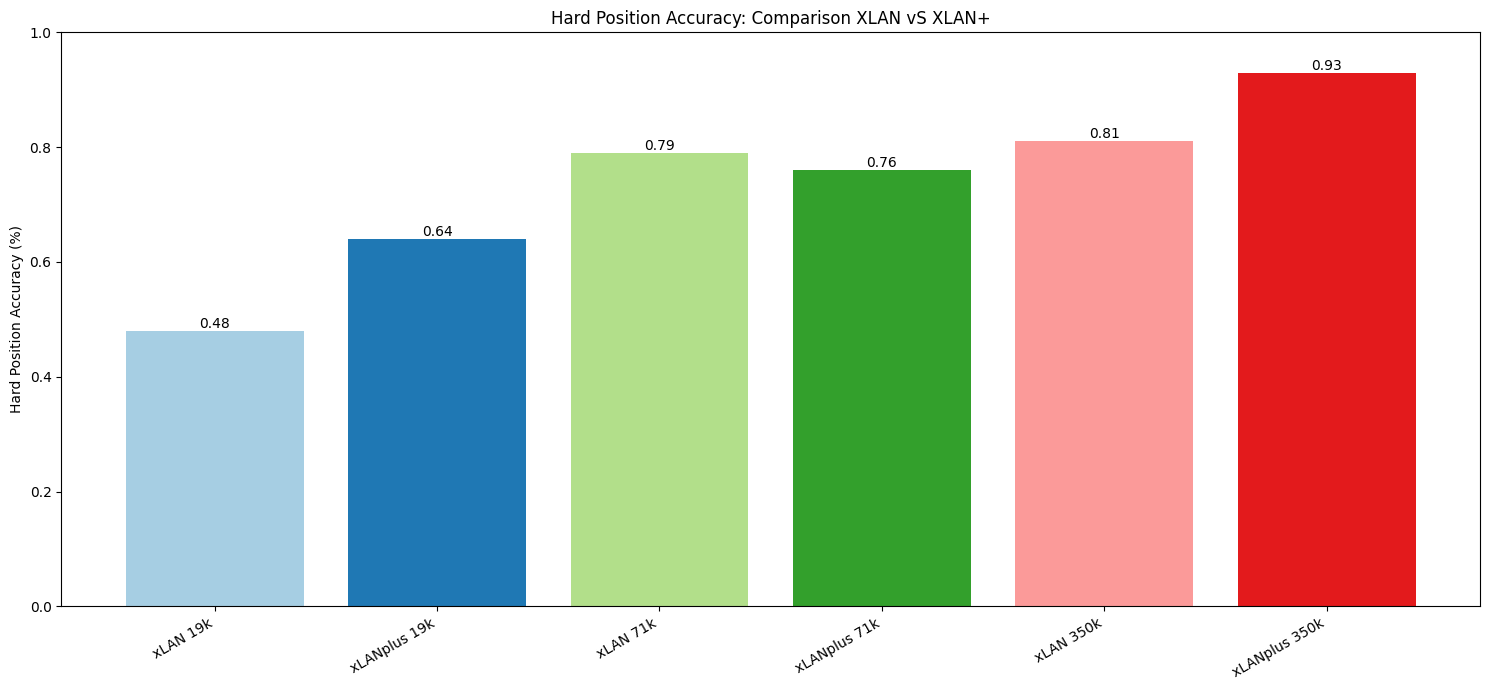

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

title = "Hard Position Accuracy: Comparison XLAN vS XLAN+"

# val_type = "Average Number of Correct Plies"
# val_type = "Hard Position Accuracy"
val_type = "Legal Piece Accuracy"

fig, ax = plt.subplots(figsize=(15, 7))

names = ["xLAN 71k", "xLANchk 71k", "xLANcap 71k", "xLANplus 71k"]

values = [0.48, 0.64, 0.79, 0.76, 0.81, 0.93]

colors = sns.color_palette("Paired", len(names))  # Generate distinct colors

for i, name in enumerate(names):
    bar = ax.bar(i, values[i], color=colors[i], label=name)
    ax.bar(name, values[i], color=colors[i], label=name)
    ax.text(
        bar[0].get_x() + bar[0].get_width() / 2,
        bar[0].get_height(),
        f"{values[i]:.2f}",
        ha="center",
        va="bottom",
    )
# y line title
if val_type == "Average Number of Correct Plies":
    ax.set_ylabel("Average Correct Plies")
elif val_type == "Hard Position Accuracy":
    ax.set_ylabel("Hard Position Accuracy (%)")
else:
    ax.set_ylabel("Legal Piece Accuracy (%)")
ax.set_title(title)
plt.xticks(rotation=30, ha="right", fontsize=10)

plt.tight_layout()
if val_type == "Average Number of Correct Plies":
    ax.set_ylim(0, 48)
else:
    ax.set_ylim(0, 1)
ax.grid(False, axis="y")

plt.savefig(f"./results/plots/notation_comparison/{title}_barplot.png")
plt.savefig(f"./results/plots/notation_comparison/{title}_barplot.svg")
plt.show()
plt.close(fig)

In [ ]:
## Set up the data for the bar plots

legal_piece_xlan = [
    "GPT2_V27_19k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V28_71k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V32_350k_4E_xLAN - legal piece moves accuracy",
]

legal_piece_xlan_plus = [
    "GPT2_V29_19k_4E_xLANplus - legal piece moves accuracy",
    "GPT2_V30_71k_4E_xLANplus - legal piece moves accuracy",
    "GPT2_V31_350k_4E_xLANplus - legal piece moves accuracy",
]

legal_piece_both_notations = [
    "GPT2_V27_19k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V29_19k_4E_xLANplus - legal piece moves accuracy",
    "GPT2_V28_71k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V30_71k_4E_xLANplus - legal piece moves accuracy",
    "GPT2_V32_350k_4E_xLAN - legal piece moves accuracy",
    "GPT2_V31_350k_4E_xLANplus - legal piece moves accuracy",
]

hard_position_xlan = [
    "GPT2_V27_19k_4E_xLAN - hard position accuracy",
    "GPT2_V28_71k_4E_xLAN - hard position accuracy",
    "GPT2_V32_350k_4E_xLAN - hard position accuracy",
]

hard_position_xlan_plus = [
    "GPT2_V29_19k_4E_xLANplus - hard position accuracy",
    "GPT2_V30_71k_4E_xLANplus - hard position accuracy",
    "GPT2_V31_350k_4E_xLANplus - hard position accuracy",
]

hard_position_both_notations = [
    "GPT2_V27_19k_4E_xLAN - hard position accuracy",
    "GPT2_V29_19k_4E_xLANplus - hard position accuracy",
    "GPT2_V28_71k_4E_xLAN - hard position accuracy",
    "GPT2_V30_71k_4E_xLANplus - hard position accuracy",
    "GPT2_V32_350k_4E_xLAN - hard position accuracy",
    "GPT2_V31_350k_4E_xLANplus - hard position accuracy",
]

average_correct_plies_xlan = [
    "GPT2_V27_19k_4E_xLAN - average correct plies",
    "GPT2_V28_71k_4E_xLAN - average correct plies",
    "GPT2_V32_350k_4E_xLAN - average correct plies",
]

average_correct_plies_xlan_plus = [
    "GPT2_V29_19k_4E_xLANplus - average correct plies",
    "GPT2_V30_71k_4E_xLANplus - average correct plies",
    "GPT2_V31_350k_4E_xLANplus - average correct plies",
]

average_correct_plies_both_notations = [
    "GPT2_V27_19k_4E_xLAN - average correct plies",
    "GPT2_V29_19k_4E_xLANplus - average correct plies",
    "GPT2_V28_71k_4E_xLAN - average correct plies",
    "GPT2_V30_71k_4E_xLANplus - average correct plies",
    "GPT2_V32_350k_4E_xLAN - average correct plies",
    "GPT2_V31_350k_4E_xLANplus - average correct plies",
]

#### Barplot with the 3 validation categories with and without BOS (6 Figures)

In [ ]:
values = dict()
columns_to_plot = legal_piece_xlan
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Legal Piece Moves Accuracy (xLAN)")

values = dict()
columns_to_plot = legal_piece_xlan_plus
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Legal Piece Moves Accuracy (xLAN+)")

values = dict()
columns_to_plot = legal_piece_both_notations
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Legal Piece Moves Accuracy")

values = dict()
columns_to_plot = hard_position_xlan
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Hard Position Accuracy (xLAN)")

values = dict()
columns_to_plot = hard_position_xlan_plus
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Hard Position Accuracy (xLAN+)")

values = dict()
columns_to_plot = hard_position_both_notations
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Hard Position Accuracy")

values = dict()
columns_to_plot = average_correct_plies_xlan
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Average Correct Plies (xLAN)")

values = dict()
columns_to_plot = average_correct_plies_xlan_plus
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Average Correct Plies (xLAN+)")

values = dict()
columns_to_plot = average_correct_plies_both_notations
for column in columns_to_plot:
    # values[column] = get_mean_last_value_and_step(df_results, column)[0]
    values[column] = get_last_value_and_step(df_results, column)[0]

plot_bars(values, "Average Correct Plies")

## Rename tables from wandb trainings logs to have a easier to understand name

#### Unzip wandb log data or use own data

In [ ]:
path = "./wandb.zip"

import zipfile

with zipfile.ZipFile(path, "r") as zip_ref:
    zip_ref.extractall("./wandb")

In [ ]:
import os

directory = "./wandb/LEON_V25_1M_00005_4E_ST/files/media/table/"
log_steps = 100  # Multiplay table number by this number to get the global step


def rename_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".json") and "table" in filename:
            parts = filename.split("table_")
            if len(parts) > 1:
                number_part = parts[1].split("_")[0]

                if number_part.isdigit():
                    number = int(number_part)
                    new_number = (number + 1) * log_steps // 3
                    new_filename = f"{parts[0].strip()}_{new_number}.json"
                    new_filename = new_filename.replace(" ", "_")
                    new_filename = new_filename.replace("__", "_")

                    old_file = os.path.join(directory, filename)
                    new_file = os.path.join(directory, new_filename)
                    os.rename(old_file, new_file)
                    print(f"Renamed '{filename}' to '{new_filename}'")


rename_files(directory)

## Plot a linediagram showing the error frequencies over trainings process

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np


def plot_error_frequencies(error_frequencies, title):
    window_size = 100
    plt.figure(figsize=(10, 6))
    for error_type, values in error_frequencies.items():
        steps, frequencies = zip(*values)
        if len(frequencies) >= window_size:
            smoothed_frequencies = moving_average(frequencies, window_size)
            smoothed_steps = steps[window_size - 1 :]
            plt.plot(smoothed_steps, smoothed_frequencies, label=error_type)
        else:
            plt.plot(steps, frequencies, label=error_type)
    save_directory = f"./results/plots/error_frequencies/"
    path = os.path.join(save_directory, title.replace(" ", "_") + ".png")

    plt.xlim(left=0)
    plt.ylim(0, 1)
    plt.xlabel("Step")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(path)
    plt.close()


def read_error_frequencies(directory):
    error_frequencies = {}
    for filename in os.listdir(directory):
        if filename.startswith("error_frequency_bar_chart_") and filename.endswith(
            ".json"
        ):
            step = int(filename.split("_")[-1].replace(".json", ""))

            with open(os.path.join(directory, filename), "r") as file:
                data = json.load(file)
                for error_type, frequency in data["data"]:
                    if error_type not in error_frequencies:
                        error_frequencies[error_type] = []
                    error_frequencies[error_type].append((step, frequency))

    for error_type in error_frequencies:
        error_frequencies[error_type].sort(key=lambda x: x[0])

    return error_frequencies


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), "valid") / window_size

In [ ]:
directory = "./wandb/LEON_V25_1M_00005_4E_ST/files/media/table/"

title = "Error Frequencies Over Steps - 1M dataset 4 Epochs with BOS"
error_frequencies = read_error_frequencies(directory)
plot_error_frequencies(error_frequencies, title)

## Plot a graph with every Position ID of hard position and how often those where correct

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt


def read_hard_positions(directory):
    predictions = {i: {"Correct": 0, "False": 0} for i in range(67)}
    move_frequencies = {i: {} for i in range(67)}

    for filename in os.listdir(directory):
        if filename.startswith("hard_position_results_") and filename.endswith(".json"):
            step = int(filename.split("_")[3].split(".")[0])
            if step < 160000:
                continue

            with open(os.path.join(directory, filename), "r") as file:
                data = json.load(file)
                for position_id, predicted_move, correctness in data["data"]:
                    if correctness:
                        predictions[position_id]["Correct"] += 1
                    else:
                        predictions[position_id]["False"] += 1

                    if predicted_move not in move_frequencies[position_id]:
                        move_frequencies[position_id][predicted_move] = 1
                    else:
                        move_frequencies[position_id][predicted_move] += 1

    predictions_df = pd.DataFrame(predictions).T.reset_index()
    predictions_df.columns = ["Position ID", "Correct Predictions", "False Predictions"]

    # Creating a list of tuples from move_frequencies dictionary
    move_freq_list = [
        (position_id, move, freq)
        for position_id, moves in move_frequencies.items()
        for move, freq in moves.items()
    ]

    # Convert the list to DataFrame
    move_frequencies_df = pd.DataFrame(
        move_freq_list, columns=["Position ID", "Predicted Move", "Frequency"]
    )

    return predictions_df, move_frequencies_df


def plot_hard_positions(predictions_df, title):
    # Calculate total and percentage of correct predictions
    predictions_df["Total Predictions"] = (
        predictions_df["Correct Predictions"] + predictions_df["False Predictions"]
    )
    predictions_df["Correct Percentage"] = (
        predictions_df["Correct Predictions"] / predictions_df["Total Predictions"]
    ) * 100
    save_directory = f"./results/plots/hard_positions/"
    path = os.path.join(save_directory, title.replace(" ", "_") + ".png")

    plt.figure(figsize=(15, 6))
    plt.bar(
        predictions_df["Position ID"],
        predictions_df["Correct Percentage"],
        color="green",
    )
    plt.xlabel("Position ID")
    plt.ylabel("Percentage of Correct Predictions (%)")
    plt.title(title)
    plt.xticks(range(0, 67), rotation=90)
    plt.xlim(-1, 67)
    plt.ylim(0, 100)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.savefig(path)
    plt.close()

In [ ]:
directory = "./wandb/LEON_V25_1M_00005_4E_ST/files/media/table/"
title = "Correct Predictions by Position ID for Hard Positions - 1M dataset 4 Epochs with BOS"
predictions_df, move_frequencies_df = read_hard_positions(directory)
plot_hard_positions(predictions_df, title)

directory = "./wandb/LEON_V15_1M_00005_4E/files/media/table/"
title = "Correct Predictions by Position ID for Hard Positions - 1M dataset 4 Epochs"
predictions_df, move_frequencies_df = read_hard_positions(directory)
plot_hard_positions(predictions_df, title)

In [ ]:
from IPython.display import HTML


def table_for_ids(selected_ids, move_frequencies_df):
    for position_id in selected_ids:
        print(f"Table for Position ID: {position_id}")

        filtered_table = move_frequencies_df[
            move_frequencies_df["Position ID"] == position_id
        ]

        # Clustering moves with frequency less than 10 into a row called "various"
        low_freq_moves = filtered_table[filtered_table["Frequency"] < 10]
        various_freq = low_freq_moves[
            "Frequency"
        ].sum()  # Sum of frequencies for low-frequency moves
        filtered_table = filtered_table[filtered_table["Frequency"] >= 10]

        # Adding the 'various' row if there are low frequency moves
        if not low_freq_moves.empty:
            various_row = pd.DataFrame(
                [
                    {
                        "Position ID": position_id,
                        "Predicted Move": "various",
                        "Frequency": various_freq,
                    }
                ]
            )
            filtered_table = pd.concat([filtered_table, various_row], ignore_index=True)
            sorted_table = filtered_table.sort_values(by="Frequency", ascending=False)

            html_table = sorted_table.to_html(index=False)
            display(HTML(html_table))

## Shows table of predicted moves for IDs in hard positions

In [ ]:
directory = "./wandb/LEON_V15_1M_00005_4E/files/media/table/"
selected_ids = [13, 20, 28, 31, 36, 38, 45, 46, 56, 57, 64, 66]
_, move_frequencies_df = read_hard_positions(directory)
table_for_ids(selected_ids, move_frequencies_df)

## Extract Sequence data from train history folders

In [ ]:
import os
import json
import pandas as pd


def extract_data_sequence_results_ST(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.startswith("sequence_results_") and filename.endswith(".json"):
            step = int(filename.split("_")[2].split(".")[0])

            with open(os.path.join(directory, filename), "r") as file:
                content = json.load(file)
                for record in content["data"]:
                    all_data.append([step] + record)

    columns = [
        "Step",
        "Game String",
        "Plies Until Error",
        "Error Type",
        "First Illegal Move",
        "Tokenized Game String",
    ]
    df = pd.DataFrame(all_data, columns=columns)

    return df


def extract_data_sequence_results(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.startswith("sequence_results_") and filename.endswith(".json"):
            step = int(filename.split("_")[2].split(".")[0])

            with open(os.path.join(directory, filename), "r") as file:
                content = json.load(file)
                for record in content["data"]:
                    all_data.append([step] + record)

    columns = [
        "Step",
        "Game String",
        "Plies Until Error",
        "Error Type",
        "First Illegal Move",
    ]
    df = pd.DataFrame(all_data, columns=columns)

    return df

In [ ]:
directory_ST = "./wandb/LEON_V25_1M_00005_4E_ST/files/media/table/"
directory = "./wandb/LEON_V15_1M_00005_4E/files/media/table/"

dataframe = extract_data_sequence_results(directory)
dataframe_ST = extract_data_sequence_results_ST(directory_ST)

### Plot average move until error with and without 0

In [ ]:
average_moves_df = dataframe.groupby("Step")["Plies Until Error"].mean().reset_index()
average_moves_df_ST = (
    dataframe_ST.groupby("Step")["Plies Until Error"].mean().reset_index()
)


average_moves_df.columns = [
    "train/global_step",
    "Average Plies Until Error Without BOS",
]
average_moves_df_ST.columns = [
    "train/global_step",
    "Average Plies Until Error With BOS",
]


average_moves_excluding_zeros = (
    dataframe[dataframe["Plies Until Error"] != 0]
    .groupby("Step")["Plies Until Error"]
    .mean()
    .reset_index()
)

average_moves_excluding_zeros.columns = [
    "train/global_step",
    "Average Plies Until Error Without BOS Excluding Zeros",
]


combined_averages = pd.merge(
    average_moves_df, average_moves_excluding_zeros, on="train/global_step"
)

combined_averages = pd.merge(
    combined_averages, average_moves_df_ST, on="train/global_step"
)

In [ ]:
plot_columns(
    combined_averages,
    [
        "Average Plies Until Error Without BOS",
        "Average Plies Until Error Without BOS Excluding Zeros",
    ],
    set_title="Average Plies Until Error Over Training Steps (Including and Excluding Synatx Errors on Move One)",
    smoothing=8,
    y_max=60,
)

In [ ]:
plot_columns(
    combined_averages,
    [
        "Average Plies Until Error Without BOS",
        "Average Plies Until Error Without BOS Excluding Zeros",
        "Average Plies Until Error With BOS",
    ],
    set_title="Average Plies Until Error Over Training Steps with and without BOS Token",
    smoothing=8,
    y_max=60,
)

### print the string of the moves for all entries with errortype "no error" where the game string is shorter than 80

In [ ]:
for index, row in dataframe.iterrows():
    if row["Error Type"] == "no error" and (row["Plies Until Error"]) < 80:
        print(row["Game String"])
        print(row["Plies Until Error"])

### Relation Between Error Types and Plies Until Error

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_results = dataframe[dataframe["Plies Until Error"] != 0]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Error Type",
    y="Plies Until Error",
    data=df_results,
    showfliers=True,
    flierprops={"marker": "o", "markersize": 3},
)


plt.title("Relation Between Error Types and Plies Until Error")
plt.xlabel("Error Type")
plt.ylabel("Plies Until Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./results/plots/error_frequencies/boxplot_error_types.png")
plt.close()

In [ ]:
from collections import Counter
import pandas as pd

# Assuming dataframe is already defined and contains columns 'Step' and 'Game String'

# Filter the DataFrame to include only rows where 'Step' is greater than 50000
filtered_df = dataframe[dataframe["Step"] > 100000]


def extract_opening_moves(game_string, n=3):
    return " ".join(game_string.split()[:n])


filtered_df["Opening Moves"] = filtered_df["Game String"].apply(
    lambda x: extract_opening_moves(x, n=2)
)

opening_move_counts = Counter(filtered_df["Opening Moves"])

opening_moves_df = pd.DataFrame(
    opening_move_counts.items(), columns=["Opening Sequence", "Frequency"]
).sort_values(by="Frequency", ascending=False)

print(opening_moves_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(
    x="Opening Sequence",
    y="Frequency",
    data=opening_moves_df.head(10),
    palette="Paired",
)

In [ ]:
total_frequency = opening_moves_df["Frequency"].sum()

# Calculate the percentage
opening_moves_df["Percentage"] = (opening_moves_df["Frequency"] / total_frequency) * 100

# Now plotting the top 10 opening sequences as a percentage
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Opening Sequence",
    y="Percentage",
    data=opening_moves_df.head(10),
    palette="Paired",
)
plt.title("Top 10 Opening Sequences as Percentage of Total")
plt.xlabel("Opening Sequence")
plt.ylabel("Percentage (%)")
plt.show()

## Import all data for legal piece moves

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt


def read_legal_piece_moves(directory):
    all_data = []

    for filename in os.listdir(directory):
        if filename.startswith("legal_piece_moves_results_") and filename.endswith(
            ".json"
        ):
            step = int(filename.split("_")[4].split(".")[0])

            with open(os.path.join(directory, filename), "r") as file:
                content = json.load(file)
                for record in content["data"]:
                    all_data.append([step] + record)

    # Create a DataFrame from the extracted data
    columns = [
        "Step",
        "Position ID",
        "Predicted Move",
        "Correct Moves",
        "Correctness",
        "Piece",
        "Tag",
    ]
    df = pd.DataFrame(all_data, columns=columns)

    return df


def plot_half_legal_piece_moves(predictions_df, title, start_id, end_id):
    filtered_df = predictions_df[
        (predictions_df["Position ID"] >= start_id)
        & (predictions_df["Position ID"] <= end_id)
    ]

    plt.figure(figsize=(15, 6))
    plt.bar(filtered_df["Position ID"], filtered_df["Correct Percentage"], color="blue")
    plt.xlabel("Position ID")
    plt.ylabel("Percentage of Correct Predictions (%)")
    plt.title(f"{title} (Position ID {start_id} to {end_id})")
    plt.xticks(range(start_id, end_id + 1), rotation=90)
    plt.ylim(0, 100)
    plt.grid(axis="y")
    plt.tight_layout()

    save_directory = "./results/plots/legal_piece_moves/"
    os.makedirs(save_directory, exist_ok=True)
    path = os.path.join(
        save_directory, title.replace(" ", "_") + f"_{start_id}_to_{end_id}.png"
    )
    plt.savefig(path)
    plt.close()


def plot_even_odd_legal_piece_moves(predictions_df, title, even=True):
    # Filter DataFrame for even or odd Position IDs
    if even:
        filtered_df = predictions_df[predictions_df["Position ID"] % 2 == 0]
        id_type = "Start Piece"
    else:
        filtered_df = predictions_df[predictions_df["Position ID"] % 2 != 0]
        id_type = "Start Piece + Start Square"

    plt.figure(figsize=(15, 6))
    plt.bar(
        filtered_df["Position ID"],
        filtered_df["Correct Percentage"],
        color="blue",
        width=1,
    )
    plt.xlabel("Position ID")
    plt.ylabel("Percentage of Correct Predictions (%)")
    plt.title(f"{title} ({id_type})")
    plt.xticks(filtered_df["Position ID"], rotation=90)
    plt.ylim(0, 100)
    plt.grid(axis="y")
    plt.tight_layout()

    save_directory = "./results/plots/legal_piece_moves/"
    os.makedirs(save_directory, exist_ok=True)
    path = os.path.join(save_directory, title.replace(" ", "_") + f"_{id_type}_IDs.png")
    plt.savefig(path)
    plt.close()

In [ ]:
directory = "./wandb/LEON_V15_1M_00005_4E/files/media/table/"

dataframe = read_legal_piece_moves(directory)
print(dataframe.head())

## Plot a graph with every Position ID of legal piece moves and how often those where correct

In [ ]:
title = "Legal Piece Moves Accuracy by Position ID"

predictions_summary = dataframe.groupby("Position ID")["Correctness"].agg(
    ["sum", "count"]
)
predictions_summary["Correct Percentage"] = (
    predictions_summary["sum"] / predictions_summary["count"] * 100
)
predictions_summary = predictions_summary.reset_index()

plot_half_legal_piece_moves(predictions_summary, title, 0, 96)
plot_half_legal_piece_moves(predictions_summary, title, 97, 193)

## Plot a graph with every Position ID of legal piece moves and how often those where correct but only best prediction need to be correct

In [ ]:
title = "Legal Piece Moves Accuracy by Position ID if only best prediction needs to be correct"

dataframe["first_correct"] = dataframe.apply(
    lambda row: row["Predicted Move"][0] in row["Correct Moves"], axis=1
)


predictions_summary = dataframe.groupby("Position ID")["first_correct"].agg(
    ["sum", "count"]
)
predictions_summary["Correct Percentage"] = (
    predictions_summary["sum"] / predictions_summary["count"] * 100
)
predictions_summary = predictions_summary.reset_index()

plot_half_legal_piece_moves(predictions_summary, title, 0, 96)
plot_half_legal_piece_moves(predictions_summary, title, 97, 193)

## Plot a graph with every Position ID of legal piece moves and how often those where correct. But as percentage

In [ ]:
def calculate_move_accuracy(row):
    correct_moves = row["Correct Moves"]
    predicted_moves = row["Predicted Move"]
    correct_count = sum(
        move in predicted_moves[: len(correct_moves)] for move in correct_moves
    )
    return correct_count / len(correct_moves) * 100 if correct_moves else 0


filtered_df = dataframe[dataframe["Step"] > 160000]
filtered_df["move_accuracy"] = filtered_df.apply(calculate_move_accuracy, axis=1)

# Prepare data for plotting using 'move_accuracy' column
predictions_summary = filtered_df.groupby("Position ID")["move_accuracy"].agg(["mean"])
predictions_summary = predictions_summary.rename(columns={"mean": "Correct Percentage"})
predictions_summary = predictions_summary.reset_index()


# Example usage
# Assuming predictions_summary_filtered is already defined and contains the necessary data
plot_even_odd_legal_piece_moves(
    predictions_summary, "Legal Piece Moves Accuracy by Position ID", even=True
)  # For even IDs
plot_even_odd_legal_piece_moves(
    predictions_summary, "Legal Piece Moves Accuracy by Position ID", even=False
)  # For odd IDs

### Add data from new model to results

In [ ]:
# import json file as dataframe and print the head
import pandas as pd

new_csv = "./results/wandb_export_2024-03-12_xlanplus.csv"
results_csv = "./results/results_ba.csv"

df_results = pd.read_csv(results_csv)
df2_new = pd.read_csv(new_csv)
df2_new = df2_new.loc[:, ~df2_new.columns.str.contains("_MIN")]
df2_new = df2_new.loc[:, ~df2_new.columns.str.contains("_MAX")]
df2_new = df2_new.loc[:, ~df2_new.columns.str.contains("- _step")]
df_combined = pd.merge(df_results, df2_new, on="train/global_step", how="outer")

df_combined = df_combined.interpolate(limit=3)

df_combined.to_csv("./results/results_ba.csv", index=False)

In [ ]:
results_csv = "./results/results_ba.csv"
df_results = pd.read_csv(results_csv)
df_interpolated = df_results.interpolate(limit=3)
df_interpolated.to_csv("./results/results_ba.csv", index=False)

In [ ]:
print(df_interpolated.columns)

# Dataset Analysis

### Number of Games after Converting to xLAN

| Dataset   | Size (Games) | Max tokens | Opening sequence(tokens)* | BOS (Begin of sequence Token) |
| --------- | ------------ | ---------- | ------------------------- |-------------------------------|
| standard_rated_19k_2023-09.tok        | 19'383         |     500        | 10 | no | 
| standard_rated_19k_2023-09_ST.tok        | 19'383         | 501            | 10|yes |
| standard_rated_71k_2023-09.tok        | 71'641         | 500            |12|no |
| standard_rated_71k_2023-09_ST.tok        | 71'641         | 501            |12|yes |
| standard_rated_350k_2023-09.tok        | 345'351         | 500            |15|no|
| standard_rated_350k_2023-09_ST.tok        | 345'351         | 501            |15|yes|
| standard_rated_1M_2023-09.tok        | 1'028'170         | 500            |18|no |
| standard_rated_1M_2023-09_ST.tok        | 1'028'170         | 501            |18|yes|


(*) one game for each starting seqence. One one game after n tokens in dataset



### Raw Datasets

| Dataset description |Dataset name| Format | Size (Games) |Size (MB) |
| ------------------- | -----------|------- | -------------|----------| 
| Raw Lichess Dataset September 2023 |standard_rated_2023-09.pgn| PGN | 93'218'629 | ca. 201'040|
| Convert to xLAN, removes all games without clear ending | standard_rated_2023-09.xlan | xLAN | 24'237'424 | 14'420 |
| Remove duplicated lines | standard_rated_2023-09_no_dup.xlan | xLAN | 23'521'034| 14'390 |
| Tokenize dataset | standard_rated_2023-09.tok | Tokens | 23'521'034 | 12'420 |
| Remove all games with more than 500 Tokens |standard_rated_2023-09_max_500.tok | Tokens | 23'340'296 | 12'180|
| Keep only one game for first  18 Tokens| standard_rated_1M_2023-09.tok       |  Tokens  | 1'028'170         | 524            |
| Keep only one game for first  15 Tokens| standard_rated_350k_2023-09.tok     |  Tokens    | 345'351         | 175            |
| Keep only one game for first  12 Tokens| standard_rated_71k_2023-09.tok     |  Tokens    | 71'641         | 36            |
| Keep only one game for first  10 Tokens| standard_rated_19k_2023-09.tok     |  Tokens | 19'383         |     10        |



## Extract data from PGN file

In [ ]:
import chess.pgn
import pandas as pd


def parse_pgn(file_path):
    with open(file_path) as pgn:
        while True:
            game = chess.pgn.read_game(pgn)
            if game is None:
                break
            yield game


def get_first_six_plies(game):
    moves = []
    board = game.board()
    for i, move in enumerate(game.mainline_moves()):
        if i >= 6:
            break
        board.push(move)
        moves.append(move.uci())
    return moves


def analyze_games(file_path):
    print("Parsing games from {}".format(file_path))
    data = {
        "white_elo": [],
        "black_elo": [],
        "result": [],
        "ending": [],
        "opening": [],
        "first_six_plies": [],
        "game_length": [],
    }
    number_of_games = 0
    for game in parse_pgn(file_path):
        headers = game.headers
        data["white_elo"].append(headers.get("WhiteElo", None))
        data["black_elo"].append(headers.get("BlackElo", None))
        data["result"].append(headers.get("Result", None))
        data["ending"].append(headers.get("Termination", None))
        data["opening"].append(headers.get("Opening", None))
        first_six_plies = get_first_six_plies(game)
        data["first_six_plies"].append(", ".join(first_six_plies))
        data["game_length"].append(len(list(game.mainline_moves())))
        number_of_games += 1
        if number_of_games % 1000 == 0:
            print("Parsed {} games".format(number_of_games))
        if number_of_games >= 500000:
            break

    # Convert data to a pandas DataFrame for analysis
    df = pd.DataFrame(data)
    return df

## Print stats of a file

In [ ]:
file_path = "V:/lichess_db_standard_rated_2023-09.pgn"
df = analyze_games(file_path)

In [ ]:
print("Median game length: {}".format(df["game_length"].median()))
print("Mean game length: {}".format(df["game_length"].mean()))
print(df["result"].value_counts())

print(df["ending"].value_counts())

print(df["opening"].value_counts())

print(df["game_length"].describe())

print(df["white_elo"].describe())

print(df["black_elo"].describe())

## print 10 most common keys for each file


In [ ]:
def make_dict(file_path):
    dict = {}

    with open(file_path) as f:
        for line in f:
            tokens = line.split()

            key = " ".join(tokens[:12])

            if key in dict:
                dict[key] += 1
            else:
                dict[key] = 1

    return dict


path19k = "./data/training/09_2023/standard_rated_19k_2023-09.tok"
path1M = "./data/training/09_2023/standard_rated_1M_2023-09.tok"
path350k = "./data/training/09_2023/standard_rated_350k_2023-09.tok"
path71k = "./data/training/09_2023/standard_rated_71k_2023-09.tok"
pathTok = "./data//lichess_db_standard_rated_2023-09.tok"
path_all_moves = "./data/training/all_moves/270k_all_moves_noLong.tok"


# make df with first 12 tokens as keys and the number of games as values for a file for each file


dict19k = make_dict(path19k)


dict1M = make_dict(path1M)


dict350k = make_dict(path350k)


dict71k = make_dict(path71k)


dictTok = make_dict(pathTok)


dict_all_moves = make_dict(path_all_moves)


print(sorted(dict19k.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(dict1M.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(dict350k.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(dict71k.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(dictTok.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(dict_all_moves.items(), key=lambda x: x[1], reverse=True)[:10])

## Prints top startsequences for a dataset

In [ ]:
from collections import Counter
from src.tokenizer.detokenizer import detokenize_data


def analyze_chess_data(file_path):
    with open(file_path, "r") as file:
        games = file.read().strip().split("\n")

    sequences_1, sequences_2, sequences_3, sequences_6 = [], [], [], []

    for game in games:
        moves = game.split()

        if len(moves) >= 3:
            sequences_1.append(" ".join(moves[:3]))

        if len(moves) >= 6:
            sequences_2.append(" ".join(moves[:6]))

        if len(moves) >= 9:
            sequences_3.append(" ".join(moves[:9]))

        if len(moves) >= 18:
            sequences_6.append(" ".join(moves[:18]))

    counts_1 = Counter(sequences_1)

    counts_2 = Counter(sequences_2)

    counts_3 = Counter(sequences_3)

    counts_6 = Counter(sequences_6)

    def get_top_sequences(counts):
        total = sum(counts.values())

        top_sequences = counts.most_common(100)

        return [(seq, count, (count / total) * 100) for seq, count in top_sequences]

    return (
        get_top_sequences(counts_1),
        get_top_sequences(counts_2),
        get_top_sequences(counts_3),
        get_top_sequences(counts_6),
    )


def get_tops(path):
    token_path = "./src/tokenizer/xlan_tokens.json"

    top_1, top_2, top_3, top_6 = analyze_chess_data(path)

    detok_top_1 = [
        (detokenize_data(seq, token_path), count, percent)
        for seq, count, percent in top_1
    ]

    detok_top_2 = [
        (detokenize_data(seq, token_path), count, percent)
        for seq, count, percent in top_2
    ]

    detok_top_3 = [
        (detokenize_data(seq, token_path), count, percent)
        for seq, count, percent in top_3
    ]
    detok_top_6 = [
        (detokenize_data(seq, token_path), count, percent)
        for seq, count, percent in top_6
    ]

    print("Top 10 sequencec after 1 move:", detok_top_1)
    print("Top 10 sequencec after 2 move:", detok_top_2)
    print("Top 10 sequencec after 3 move:", detok_top_3)
    print("Top 10 sequencec after 6 move:", detok_top_6)

In [ ]:
print("tok: ")
get_tops(pathTok)
print("1M: ")
get_tops(path1M)
print("350k: ")
get_tops(path350k)
print("71k: ")
get_tops(path71k)
print("19k: ")
get_tops(path19k)
print("all_moves: ")
get_tops(path_all_moves)

## Evaluate and compare model performance (Legal Piece Moves & Hard Positions)

In [ ]:
eval_path = "./results/model_evaluations"
models = ["V27", "V28", "V29", "V30", "V31", "V32"]

In [ ]:
import os

os.listdir(eval_path)

In [ ]:
# create dfs from all the csv files in the folder

legal_piece_moves_results_df = []
for file in sorted(os.listdir(eval_path)):
    if "legal_piece" in file:
        # make df
        df_1 = pd.read_csv(os.path.join(eval_path, file))
        # only keep column "Correctness" of df
        df_1 = df_1[["Correctness"]]
        # rename this column to the model name (first three letters of the file name)
        model_spec = "_".join(file.split("_")[:5])
        result = df_1.rename(columns={"Correctness": model_spec})
        # add this df to the list
        legal_piece_moves_results_df.append(result)

# concatenate all the dfs in the list to one df
legal_piece_moves_results_df = pd.concat(legal_piece_moves_results_df, axis=1)
legal_piece_moves_results_df.head()

In [ ]:
# how many rows are true for V32_GPT2_350k_4E_xLAN?

v32_sum_correct_legal_piece_moves = legal_piece_moves_results_df[
    "V32_GPT2_350k_4E_xLAN"
].sum()
v31_sum_correct_legal_piece_moves = legal_piece_moves_results_df[
    "V31_GPT2_350k_4E_xLANplus"
].sum()
total_number_of_legal_piece_moves = len(legal_piece_moves_results_df)

print(
    f"V32 (350k, xLAN): {v32_sum_correct_legal_piece_moves} correct / {total_number_of_legal_piece_moves} total ({v32_sum_correct_legal_piece_moves / total_number_of_legal_piece_moves * 100:.2f}%)"
)
print(
    f"V31 (350k, xLAN+): {v31_sum_correct_legal_piece_moves} correct / {total_number_of_legal_piece_moves} total ({v31_sum_correct_legal_piece_moves / total_number_of_legal_piece_moves * 100:.2f}%)"
)

print()
print(
    'list indexes of rows where "V32 (350k, xLAN)" is True and "V31 (350k, xLAN+)" is False:'
)
print(
    "(These are the positions where the model with xLAN performs better than the model trained with xLAN+.)"
)

print(
    legal_piece_moves_results_df[
        (legal_piece_moves_results_df["V32_GPT2_350k_4E_xLAN"] == True)
        & (legal_piece_moves_results_df["V31_GPT2_350k_4E_xLANplus"] == False)
    ].index.tolist()
)

print()
print(
    'list indexes of rows where "V32 (350k, xLAN)" is False and "V31 (350k, xLAN+)" is True:'
)
print(
    "(These are the positions where the model with xLAN+ performs better than the model trained with xLAN.)"
)

print(
    legal_piece_moves_results_df[
        (legal_piece_moves_results_df["V32_GPT2_350k_4E_xLAN"] == False)
        & (legal_piece_moves_results_df["V31_GPT2_350k_4E_xLANplus"] == True)
    ].index.tolist()
)

In [ ]:
# create dfs from all the csv files in the folder

hard_positions_results_df = []
for file in sorted(os.listdir(eval_path)):
    if "hard_positions" in file:
        # make df
        df_2 = pd.read_csv(os.path.join(eval_path, file))
        # only keep column "Correctness" of df
        df_2 = df_2[["Correctness"]]
        # rename this column to the model name (first three letters of the file name)
        model_spec = "_".join(file.split("_")[:5])
        result = df_2.rename(columns={"Correctness": model_spec})
        # add this df to the list
        hard_positions_results_df.append(result)

# concatenate all the dfs in the list to one df
hard_positions_results_df = pd.concat(hard_positions_results_df, axis=1)
hard_positions_results_df.head()

In [ ]:
# how many rows are true for V32_GPT2_350k_4E_xLAN?

v32_sum_correct_hard_positions = hard_positions_results_df[
    "V32_GPT2_350k_4E_xLAN"
].sum()
v31_sum_correct_hard_positions = hard_positions_results_df[
    "V31_GPT2_350k_4E_xLANplus"
].sum()
total_number_of_hard_positions = len(hard_positions_results_df)

print(
    f"V32 (350k, xLAN): {v32_sum_correct_hard_positions} correct / {total_number_of_hard_positions} total ({v32_sum_correct_hard_positions / total_number_of_hard_positions * 100:.2f}%)"
)
print(
    f"V31 (350k, xLAN+): {v31_sum_correct_hard_positions} correct / {total_number_of_hard_positions} total ({v31_sum_correct_hard_positions / total_number_of_hard_positions * 100:.2f}%)"
)

print()
print(
    'list indexes of rows where "V32 (350k, xLAN)" is True and "V31 (350k, xLAN+)" is False:'
)
print(
    "(These are the positions where the model with xLAN performs better than the model trained with xLAN+.)"
)

print(
    hard_positions_results_df[
        (hard_positions_results_df["V32_GPT2_350k_4E_xLAN"] == True)
        & (hard_positions_results_df["V31_GPT2_350k_4E_xLANplus"] == False)
    ].index.tolist()
)

print()
print(
    'list indexes of rows where "V32 (350k, xLAN)" is False and "V31 (350k, xLAN+)" is True:'
)
print(
    "(These are the positions where the model with xLAN+ performs better than the model trained with xLAN.)"
)

print(
    hard_positions_results_df[
        (hard_positions_results_df["V32_GPT2_350k_4E_xLAN"] == False)
        & (hard_positions_results_df["V31_GPT2_350k_4E_xLANplus"] == True)
    ].index.tolist()
)

# Error Frequencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV data

path_v47 = (
    "results/model_evaluations/V47_Mamba_350k_4E_XLANplus_sequence_results_1000x125.csv"
)
path_v31 = (
    "results/model_evaluations/V31_GPT2_350k_4E_xLANplus_sequence_results_1000x125.csv"
)
path_v63 = "results/model_evaluations/V63_GPT2_350k_4E_xLANplus_RIGHT_PAD_sequence_results_1000x125.csv"
path_v70 = "results/model_evaluations/V70_Mamba_350k_4E_xLANplus_RIGHT_PAD_sequence_results_1000x125.csv"

df_v31 = pd.read_csv(path_v31)
df_v47 = pd.read_csv(path_v47)
df_v63 = pd.read_csv(path_v63)
df_v70 = pd.read_csv(path_v70)

df_v47

In [ ]:
# print statistics

# average number of moves until error
# just take column "Moves Until Error" and calculate mean

print(
    f"V47: Average number of moves until error = {df_v47['Moves Until Error'].mean():.2f}"
)
print(
    f"V63: Average number of moves until error = {df_v63['Moves Until Error'].mean():.2f}"
)
print(
    f"V70: Average number of moves until error = {df_v70['Moves Until Error'].mean():.2f}"
)

print()

# percentage of error types

# count the number of each error type
# divide by the total number of errors

error_types_v47 = df_v47["Error Type"].value_counts(normalize=True) * 100
error_types_v63 = df_v63["Error Type"].value_counts(normalize=True) * 100
error_types_v70 = df_v70["Error Type"].value_counts(normalize=True) * 100

print("V47: Error Types (% of total errors)")
print(error_types_v47)
print()
print("V63: Error Types (% of total errors)")
print(error_types_v63)
print()
print("V70: Error Types (% of total errors)")
print(error_types_v70)

In [ ]:
# show unique values in column "Error Type"

df_v70["Error Type"].unique()

In [ ]:
def show_error_frequencies_absolute(path):
    version_number = path.split("/")[-1].split("_")[0]

    df_error_frequencies = pd.read_csv(path)

    # Create buckets for "Moves Until Error" (every ten moves)
    min_moves = df_error_frequencies["Moves Until Error"].min()
    max_moves = df_error_frequencies["Moves Until Error"].max()

    bins = range(0, max_moves + 10, 10)
    labels = [f"{i+1}-{i+10}" for i in bins[:-1]]

    df_error_frequencies["Error Bucket"] = pd.cut(
        df_error_frequencies["Moves Until Error"], bins=bins, labels=labels
    )

    # Group by error bucket and error type
    error_summary = (
        df_error_frequencies.groupby(["Error Bucket", "Error Type"])
        .size()
        .unstack(fill_value=0)
    )

    error_types = [
        "syntax",
        "piece logic",
        "path obstruction",
        "pseudolegal",
        "indicator error",
        "no error",
        "max length",
    ]

    for error_type in error_types:
        if error_type not in error_summary.columns:
            error_summary[error_type] = 0

    error_summary = error_summary[error_types]

    # Plot the results in a stacked bar chart
    ax = error_summary.plot(kind="bar", stacked=True, figsize=(12, 6))
    ax.set_xlabel("Moves Until Error")
    ax.set_ylabel("Number of Errors")
    ax.set_title(
        f"Number of Errors by Moves Until Error and Error Type ({version_number})"
    )
    ax.set_ylim(0, 230)
    plt.xticks(rotation=45)
    plt.legend(title="Error Type", loc="upper left")
    plt.tight_layout()
    # export the plot to folder "results/plots/err_frequencies"
    plt.savefig(
        f"results/plots/error_frequencies/{version_number}_error_frequencies.png"
    )
    plt.show()

In [ ]:
show_error_frequencies_absolute(path_v47)
show_error_frequencies_absolute(path_v63)
show_error_frequencies_absolute(path_v70)
show_error_frequencies_absolute(path_v31)